KNN

1.Attribuez aléatoirement des centroïdes pour démarrer les choses.

2. En fonction de ces centroïdes (et de la distance qui les sépare), affectez chaque observation à un cluster.

3. Calculez les coordonnées moyennes de chaque cluster; ce sont nos nouveaux centroïdes.

4. Réaffectez les clusters en fonction des nouveaux centroïdes.

5. Continuez à répéter les étapes 3 et 4 jusqu'à la convergence.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib

In [3]:
df = pd.read_csv("dataset_1.csv")
df

,Unnamed: 0,normalized_age,normalized_salary
0,0,0.680267,-0.016342
1,1,3.809518,0.798483
2,2,-1.661372,-0.577667
3,3,-0.257307,-0.155552
4,4,0.698017,0.174561
...,...,...,...
995,995,-5.060165,2.482045
996,996,-5.079404,2.773580
997,997,-5.861520,3.068426
998,998,-5.018934,3.110904


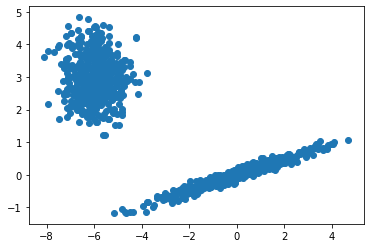

In [4]:
plt.scatter(df['normalized_age'], df['normalized_salary'])

In [5]:
X = df[['normalized_age','normalized_salary']]
X.shape

(1000, 2)

###  Calcule de  la distance euclidienne 

Distance euclidienne => la racine carrée de la somme des différences au carré entre les deux vecteurs .

- Distance euclidienne = sqrt (somme i à N (x1_i - x2_i) ^ 2)

Où x1 est la première ligne de données, x2 est la deuxième ligne de données et i est l'index d'une colonne spécifique lorsque nous additionnons toutes les colonnes.

Avec la distance euclidienne, plus la valeur est petite, plus les deux enregistrements seront similaires. Une valeur de 0 signifie qu'il n'y a pas de différence entre deux enregistrements.

In [6]:
def calc_distance(x1, x2):
    distance = (sum((x1 - x2)**2))**0.5
    return distance

###  Assigner les clusters  en fonction du centroïde le plus proche 

In [7]:
#  calculer la distance entre chaque observation et chaque centroïde
def assign_clusters(centroids, cluster_array): # cluster_array correspond à chaque features c a dire X
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, cluster_array[i])) # on calcule la distance euc entre chaq point et les centroid
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

Il attribue ensuite une observation à un cluster en fonction du centroïde dont il est le plus proche. Le résultat est la liste de l'étiquette de cluster de chaque observation.

pb : les centroides sont assignés aléatoirement 

### Mise à jour des nouveaux centroïdes

In [13]:
# Calculer les nouveaux centroïdes sur la base de la moyenne 
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster'] == c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

Concatèner les données (salaire et âge de chaque observation), cluster_array et le cluster actuel auquel il appartient, ensemble dans un dataframe => cluster_df 

### Calculer la variance à l'intérieur de chaque cluster

In [9]:
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster'] ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

On filtre cluster_df par cluster, calcule la moyenne, puis soustrait la moyenne du cluster de chaque observation au sein du cluster.
repmat , prend un tableau donné et le reproduit - dans notre cas, nous voulons copier la moyenne autant de fois que nous avons d'observations afin de pouvoir soustraire directement les deux tableaux.

In [18]:
cluster_data = X
cluster_array = np.array(cluster_data)

print(cluster_array)

[[ 0.68026725 -0.01634235]
 [ 3.80951844  0.79848348]
 [-1.6613724  -0.57766695]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]


In [260]:
#centroidbis = [(numpy.mean(X[numpy.where(numpy.array(clusters) == cent)],axis=0)) for cent in range(k)]

In [17]:
# Calculer les nouveaux centroïdes sur la base de la moyenne 
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster'] == c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster'] ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

cluster_data = X
cluster_array = np.array(cluster_data)

k = 2
cluster_vars = []
iteration = 4
i = 0
centroids = [cluster_array[i] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
# print(clusters)
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))

while i < iteration:
    centroids = calc_centroids(clusters, cluster_array)
    print(centroids)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, cluster_array))
    cluster_vars.append(cluster_var)
    i+=1
    print(i, round(cluster_var))

0 5562.0
[0   -3.334835
1    1.543255
dtype: float64, 0    2.961672
1    0.697238
dtype: float64]
1 2786.0
[0   -4.689470
1    2.006967
dtype: float64, 0    1.089003
1    0.259177
dtype: float64]
2 1224.0
[0   -5.730647
1    2.677255
dtype: float64, 0    0.280268
1    0.072948
dtype: float64]
3 986.0
[0   -5.956853
1    2.931999
dtype: float64, 0    0.037322
1    0.015725
dtype: float64]
4 980.0


cluster_vars => la moyenne des sommes d'écarts au carré des clusters par rapport à leurs centroïdes dans la liste 
Cette moyenne est une mesure approximative du niveau de variance au sein de chaque cluster. 
A partir de la 5éme itaration elle  se stabilise.

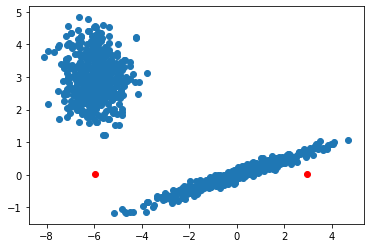

In [265]:
plt.scatter(df['normalized_age'], df['normalized_salary'])
plt.scatter(centroids[0],centroids[1], c='r')
plt.show()

In [266]:
cluster_df = pd.concat([pd.DataFrame(cluster_array), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
cluster_df

,0,1,cluster
0,0.680267,-0.016342,1
1,3.809518,0.798483,1
2,-1.661372,-0.577667,1
3,-0.257307,-0.155552,1
4,0.698017,0.174561,1
...,...,...,...
995,-5.060165,2.482045,0
996,-5.079404,2.773580,0
997,-5.861520,3.068426,0
998,-5.018934,3.110904,0


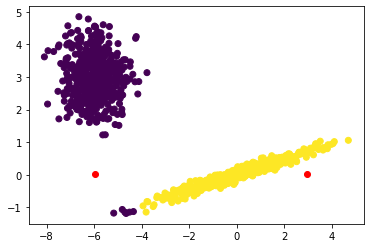

In [267]:
plt.scatter(cluster_df[0], cluster_df[1], c=clusters)
plt.scatter(centroids[0],centroids[1], c='r')
plt.show()